In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
try:
    data = pd.read_csv(url, header=None, sep='\s+')
except pd.errors.EmptyDataError as e:
    print("Error: The dataset is empty or could not be read.")
    print(e)
    exit(1)
except Exception as e:
    print("An error occurred while reading the dataset.")
    print(e)
    exit(1)
data = pd.read_csv(url, header=None, sep='\s+')

# Define the feature names
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Convert the data to a DataFrame and add the feature names
df = pd.DataFrame(data.values, columns=feature_names)


# Add the target variable
'''df['MEDV'] = pd.read_csv(url, header=None, sep='\s+', skiprows=len(data), nrows=1, engine='python').values.reshape(1, -1)'''

"df['MEDV'] = pd.read_csv(url, header=None, sep='\\s+', skiprows=len(data), nrows=1, engine='python').values.reshape(1, -1)"

In [32]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


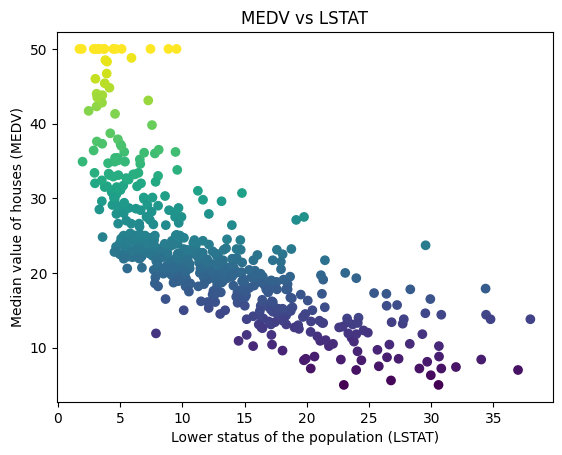

In [34]:
# @title MEDV vs LSTAT

import matplotlib.pyplot as plt
plt.scatter(df['LSTAT'], df['MEDV'], c=df['MEDV'])
plt.xlabel('Lower status of the population (LSTAT)')
plt.ylabel('Median value of houses (MEDV)')
_ = plt.title('MEDV vs LSTAT')

In [35]:
# Split the data into features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Define the inputs
input_layer = tf.keras.Input(shape=(X.shape[1],))

# Define the hidden layers
hidden_1 = tf.keras.layers.Dense(32, activation='relu')(input_layer)
hidden_2 = tf.keras.layers.Dense(16, activation='relu')(hidden_1)

# Define the output layer
output_layer = tf.keras.layers.Dense(1)(hidden_2)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

# Make predictions
predictions = model.predict(X_test)

# Print the results
print(f'Predictions: \n{predictions}\n')
print(f'Actual: \n{y_test}\n')

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 645.5976 - val_loss: 569.8733
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 622.6944 - val_loss: 550.1466
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 601.0142 - val_loss: 530.0452
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 577.6782 - val_loss: 508.6376
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 552.3255 - val_loss: 483.9495
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 522.5591 - val_loss: 454.6216
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 487.0331 - val_loss: 419.3249
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 443.8200 - val_loss: 378.8072
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 396.8297 - val_loss: 332.2733
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss